In [1]:
from coin2dic import coin2dic
import pandas as pd
import csv
import matplotlib.pyplot as plt
import os
import scipy.signal as signal
import numpy as np
import similaritymeasures
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats

In [2]:
LAST_YEARS_DIR = './Crypto_19-20' 
coins = pd.DataFrame()
for csv_file in os.listdir(LAST_YEARS_DIR):
    file_name = os.path.join(LAST_YEARS_DIR, csv_file)
    coin_dict = coin2dic(file_name)
    coins = coins.append(coin_dict, ignore_index=True)
coins = coins.set_index('Name')
coins.head()

,market_cap,normalized_price,price,volume,year
Name,,,,,
Kyber Network,"[23177641.0, 17634388.0, 21347773.0, 20632706....","[0.09191276595744681, 0.06993085106382979, 0.0...","[0.172796, 0.13147, 0.136816, 0.132233, 0.1169...","[3041633.0, 2404111.0, 3733933.0, 2385264.0, 1...","[2019.0, 2019.0, 2019.0, 2019.0, 2019.0, 2019...."
XRP,"[15028369642.0, 13045216854.0, 13181215054.0, ...","[0.5943283143852313, 0.5128054968048773, 0.518...","[0.368395, 0.317863, 0.321177, 0.309439, 0.302...","[492558794.0, 452358902.0, 407205881.0, 362599...","[2019.0, 2019.0, 2019.0, 2019.0, 2019.0, 2019...."
Stellar,"[2306881891.0, 1981659222.0, 2002863078.0, 184...","[0.6198204135431254, 0.5334510668094571, 0.539...","[0.120384, 0.103609, 0.104702, 0.096316, 0.081...","[93094440.0, 119389904.0, 123424390.0, 1349884...","[2019.0, 2019.0, 2019.0, 2019.0, 2019.0, 2019...."
Tether,"[1910347641.0, 1967105373.0, 2050721693.0, 203...","[1.0, 1.0, 1.0, 0.9901960784313726, 0.98039215...","[1.02, 1.02, 1.02, 1.01, 1.0, 1.0, 1.0, 1.01, ...","[4224650070.0, 3380321686.0, 4389435191.0, 393...","[2019.0, 2019.0, 2019.0, 2019.0, 2019.0, 2019...."
aelf,"[35560648.0, 27831782.0, 30215498.0, 29471180....","[0.5246585641932365, 0.4106276800542001, 0.445...","[0.127002, 0.099399, 0.107912, 0.105254, 0.098...","[4491096.0, 2613764.0, 3744827.0, 2588166.0, 1...","[2019.0, 2019.0, 2019.0, 2019.0, 2019.0, 2019...."


### Para analizar la tendencia de la serie se utilizará un filtro de Hodrick - Prescott

In [3]:
price_cycle, price_trend, normalized_price_trend, normalized_price_cycle = [], [], [], []

for index, row in coins.iterrows():
    price = row['price']
    temp_price_cycle, temp_price_trend = sm.tsa.filters.hpfilter(price)
    normalized_price = row['normalized_price']
    temp_normalized_price_cycle, temp_normalized_price_trend = sm.tsa.filters.hpfilter(normalized_price)
    price_cycle.append(temp_price_cycle)
    price_trend.append(temp_price_trend)
    normalized_price_cycle.append(temp_normalized_price_cycle)
    normalized_price_trend.append(temp_normalized_price_trend)
coins['price_cycle'] = price_cycle
coins['price_trend'] = price_trend
coins['normalized_price_cycle'] = normalized_price_cycle
coins['normalized_price_trend'] = normalized_price_trend
coins.head()

,market_cap,normalized_price,price,volume,year,price_cycle,price_trend,normalized_price_cycle,normalized_price_trend
Name,,,,,,,,,
Kyber Network,"[23177641.0, 17634388.0, 21347773.0, 20632706....","[0.09191276595744681, 0.06993085106382979, 0.0...","[0.172796, 0.13147, 0.136816, 0.132233, 0.1169...","[3041633.0, 2404111.0, 3733933.0, 2385264.0, 1...","[2019.0, 2019.0, 2019.0, 2019.0, 2019.0, 2019....","[0.032588163609448356, -0.016846721652506613, ...","[0.14020783639055165, 0.14831672165250662, 0.1...","[0.017334129579493346, -0.008961022155589263, ...","[0.07457863637795346, 0.07889187321941905, 0.0..."
XRP,"[15028369642.0, 13045216854.0, 13181215054.0, ...","[0.5943283143852313, 0.5128054968048773, 0.518...","[0.368395, 0.317863, 0.321177, 0.309439, 0.302...","[492558794.0, 452358902.0, 407205881.0, 362599...","[2019.0, 2019.0, 2019.0, 2019.0, 2019.0, 2019....","[0.05548706015131605, 0.003622071381728431, 0....","[0.3129079398486839, 0.3142409286182716, 0.315...","[0.08951677121003832, 0.005843454929855274, 0....","[0.504811543175193, 0.506962041875022, 0.50916..."
Stellar,"[2306881891.0, 1981659222.0, 2002863078.0, 184...","[0.6198204135431254, 0.5334510668094571, 0.539...","[0.120384, 0.103609, 0.104702, 0.096316, 0.081...","[93094440.0, 119389904.0, 123424390.0, 1349884...","[2019.0, 2019.0, 2019.0, 2019.0, 2019.0, 2019....","[0.02367773605990743, 0.006243266218558113, 0....","[0.09670626394009257, 0.0973657337814419, 0.09...","[0.1219094244784798, 0.03214466913748437, 0.03...","[0.49791098906464565, 0.5013063976719727, 0.50..."
Tether,"[1910347641.0, 1967105373.0, 2050721693.0, 203...","[1.0, 1.0, 1.0, 0.9901960784313726, 0.98039215...","[1.02, 1.02, 1.02, 1.01, 1.0, 1.0, 1.0, 1.01, ...","[4224650070.0, 3380321686.0, 4389435191.0, 393...","[2019.0, 2019.0, 2019.0, 2019.0, 2019.0, 2019....","[0.0060537267377287485, 0.0069470403322338115,...","[1.0139462732622713, 1.0130529596677662, 1.012...","[0.00593502621344566, 0.006810823855126991, 0....","[0.9940649737865543, 0.993189176144873, 0.9923..."
aelf,"[35560648.0, 27831782.0, 30215498.0, 29471180....","[0.5246585641932365, 0.4106276800542001, 0.445...","[0.127002, 0.099399, 0.107912, 0.105254, 0.098...","[4491096.0, 2613764.0, 3744827.0, 2588166.0, 1...","[2019.0, 2019.0, 2019.0, 2019.0, 2019.0, 2019....","[0.018508544923377723, -0.014814033478618607, ...","[0.10849345507662228, 0.11421303347861861, 0.1...","[0.0764607376640164, -0.06119832392247909, -0....","[0.44819782652922013, 0.4718260039766792, 0.49..."


In [4]:
def moving_avg(x, n):
    if n ==0:
        return x
    else:
        cumsum = np.cumsum(np.insert(x, 0, 0)) 
        return (cumsum[n:] - cumsum[:-n]) / float(n)
def distances(coin, bitcoin):
    x = range(len(bitcoin))
    num_data = np.zeros((len(x),2))
    num_data[:, 0] = x
    num_data[:, 1] = bitcoin
    exp_data = np.zeros((len(x), 2))
    exp_data[:, 0] = x
    exp_data[:, 1] = coin
    pcm = round(similaritymeasures.pcm(exp_data,num_data),2)
    df = round(similaritymeasures.frechet_dist(exp_data,num_data),2)
    area = round(similaritymeasures.area_between_two_curves(exp_data,num_data),2)
    cl = round(similaritymeasures.curve_length_measure(exp_data,num_data),2)
    dtw, d = similaritymeasures.dtw(exp_data,num_data)
    dtw = round(dtw,2)
    correlation = signal.correlate(bitcoin, coin)
    correlation = float(max(correlation))
    return pcm, df, area, cl ,dtw, correlation

### Se utilizarán algunas métricas para buscar las monedas con comportamiento más similar al BTC

In [15]:
def get_distances(coins):
    bitcoin = coins.loc['Bitcoin']['normalized_price']
    partial_curve_mapping = []
    fretchet = []
    area_between_curves = []
    curve_lenght = []
    dynamic_time_warping = []
    correlation = []
    for index, row in coins.iterrows():
        price = coins.loc[index]['normalized_price']
        pcm, df, area, cl, dtw, corr = distances(price,bitcoin)
        partial_curve_mapping.append(pcm)
        fretchet.append(df)
        area_between_curves.append(area)
        curve_lenght.append(cl)
        dynamic_time_warping.append(dtw)
        correlation.append(corr)
    return partial_curve_mapping, fretchet, area_between_curves, curve_lenght, dynamic_time_warping, correlation




### Primero se elimina de las listas con las métricas el valor que corresponde a comparar BTC con BTC


In [16]:

partial_curve_mapping, fretchet, area_between_curves, curve_lenght, dynamic_time_warping, correlation = get_distances(coins)
indexes = coins.index.tolist()
btc_index = indexes.index('Bitcoin')

correlation[btc_index] = np.nan
curve_lenght[btc_index] = np.nan
dynamic_time_warping[btc_index] = np.nan
fretchet[btc_index] = np.nan
partial_curve_mapping[btc_index] = np.nan
area_between_curves[btc_index] = np.nan


In [17]:

coins['correlation'] = correlation
coins['curve_lenght'] = curve_lenght
coins['fretchet'] = fretchet
coins['partial_curve_mapping'] = partial_curve_mapping
coins['area_between_curves'] = area_between_curves
coins['dynamic_time_warping'] = dynamic_time_warping

In [18]:
coins.head()

,market_cap,normalized_price,price,volume,year,price_cycle,price_trend,normalized_price_cycle,normalized_price_trend,correlation,curve_lenght,fretchet,partial_curve_mapping,area_between_curves,dynamic_time_warping
Name,,,,,,,,,,,,,,,
Kyber Network,"[23177641.0, 17634388.0, 21347773.0, 20632706....","[0.09191276595744681, 0.06993085106382979, 0.0...","[0.172796, 0.13147, 0.136816, 0.132233, 0.1169...","[3041633.0, 2404111.0, 3733933.0, 2385264.0, 1...","[2019.0, 2019.0, 2019.0, 2019.0, 2019.0, 2019....","[0.032588163609448356, -0.016846721652506613, ...","[0.14020783639055165, 0.14831672165250662, 0.1...","[0.017334129579493346, -0.008961022155589263, ...","[0.07457863637795346, 0.07889187321941905, 0.0...",15.184573,7.34,0.51,11.58,24.13,24.43
XRP,"[15028369642.0, 13045216854.0, 13181215054.0, ...","[0.5943283143852313, 0.5128054968048773, 0.518...","[0.368395, 0.317863, 0.321177, 0.309439, 0.302...","[492558794.0, 452358902.0, 407205881.0, 362599...","[2019.0, 2019.0, 2019.0, 2019.0, 2019.0, 2019....","[0.05548706015131605, 0.003622071381728431, 0....","[0.3129079398486839, 0.3142409286182716, 0.315...","[0.08951677121003832, 0.005843454929855274, 0....","[0.504811543175193, 0.506962041875022, 0.50916...",21.247433,2.87,0.39,6.96,14.44,14.65
Stellar,"[2306881891.0, 1981659222.0, 2002863078.0, 184...","[0.6198204135431254, 0.5334510668094571, 0.539...","[0.120384, 0.103609, 0.104702, 0.096316, 0.081...","[93094440.0, 119389904.0, 123424390.0, 1349884...","[2019.0, 2019.0, 2019.0, 2019.0, 2019.0, 2019....","[0.02367773605990743, 0.006243266218558113, 0....","[0.09670626394009257, 0.0973657337814419, 0.09...","[0.1219094244784798, 0.03214466913748437, 0.03...","[0.49791098906464565, 0.5013063976719727, 0.50...",20.044916,3.03,0.42,6.65,16.77,17.02
Tether,"[1910347641.0, 1967105373.0, 2050721693.0, 203...","[1.0, 1.0, 1.0, 0.9901960784313726, 0.98039215...","[1.02, 1.02, 1.02, 1.01, 1.0, 1.0, 1.0, 1.01, ...","[4224650070.0, 3380321686.0, 4389435191.0, 393...","[2019.0, 2019.0, 2019.0, 2019.0, 2019.0, 2019....","[0.0060537267377287485, 0.0069470403322338115,...","[1.0139462732622713, 1.0130529596677662, 1.012...","[0.00593502621344566, 0.006810823855126991, 0....","[0.9940649737865543, 0.993189176144873, 0.9923...",45.124731,4.26,0.82,49.02,52.95,53.35
aelf,"[35560648.0, 27831782.0, 30215498.0, 29471180....","[0.5246585641932365, 0.4106276800542001, 0.445...","[0.127002, 0.099399, 0.107912, 0.105254, 0.098...","[4491096.0, 2613764.0, 3744827.0, 2588166.0, 1...","[2019.0, 2019.0, 2019.0, 2019.0, 2019.0, 2019....","[0.018508544923377723, -0.014814033478618607, ...","[0.10849345507662228, 0.11421303347861861, 0.1...","[0.0764607376640164, -0.06119832392247909, -0....","[0.44819782652922013, 0.4718260039766792, 0.49...",20.649273,4.71,0.65,17.72,21.12,21.51


### ahora se deben analizar las métricas utilizadas y determinar cuales funcionan mejor, para esto se van a graficar las 3 monedas que más coinciden según cada métrica. La correlación no es útil porque las curvas con mayor correlación son aquellas cuyo precio se mantiene cercano a 1 sin muchas variaciones.


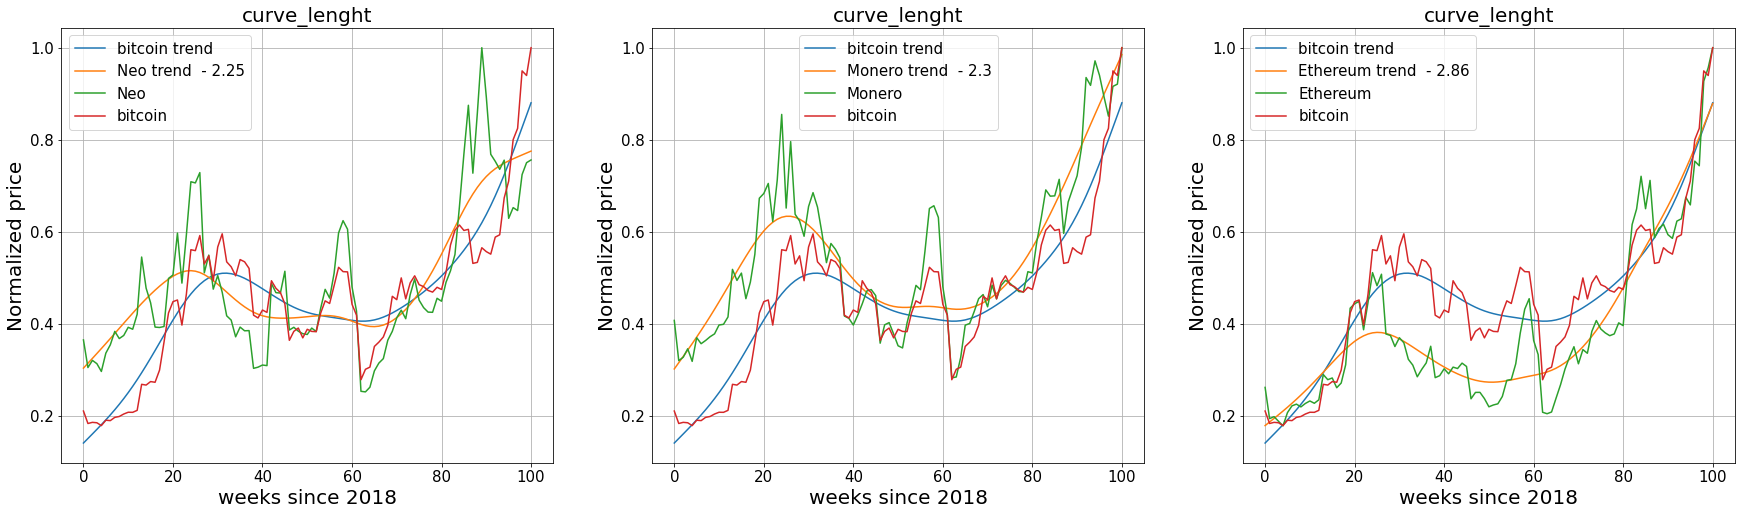

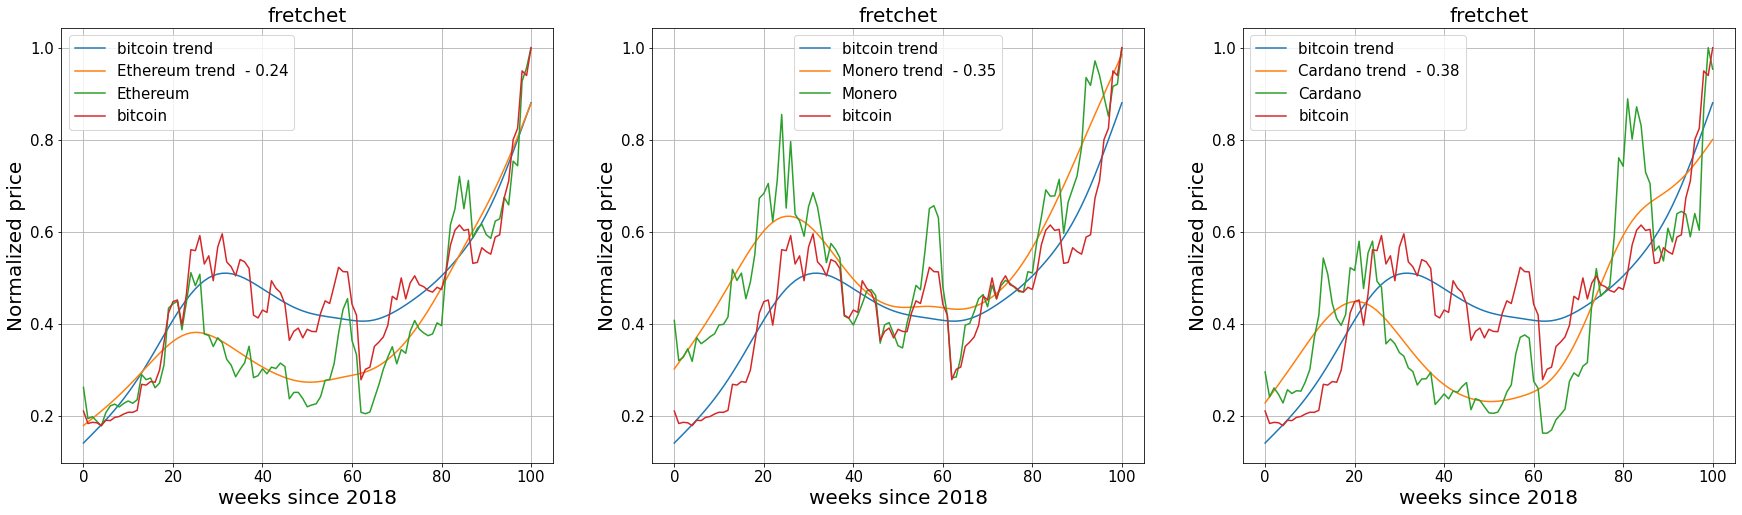

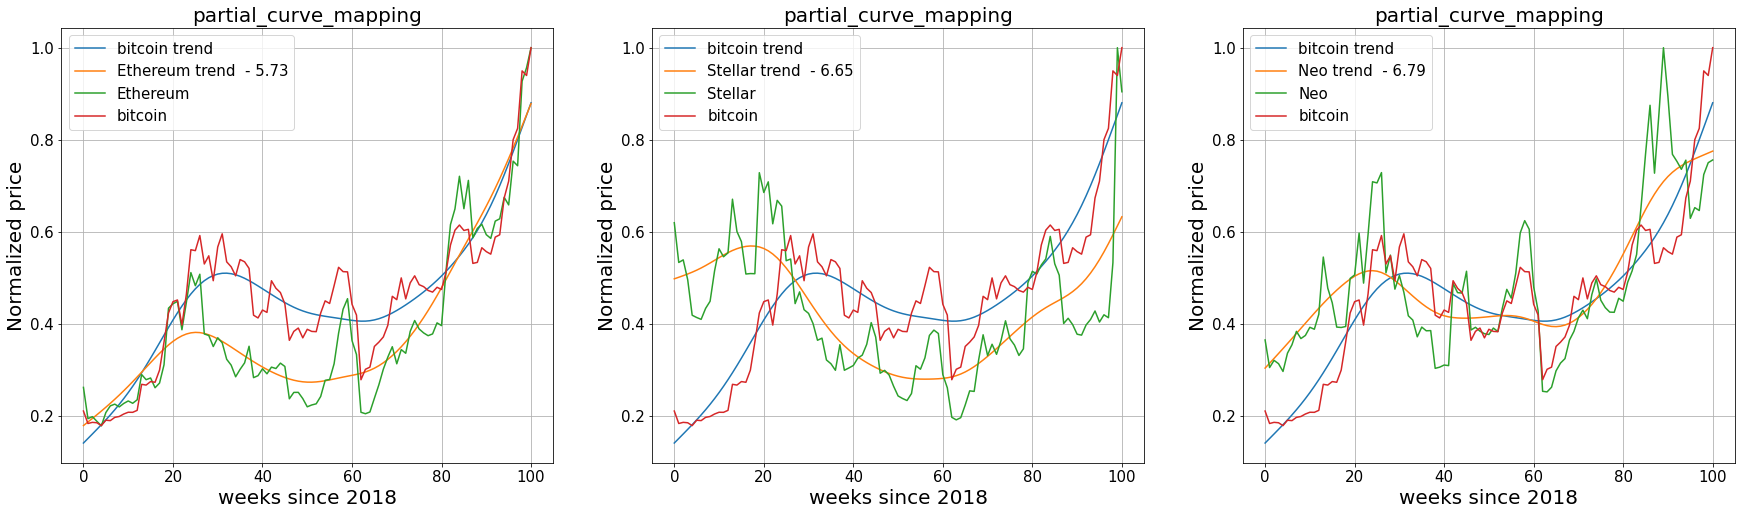

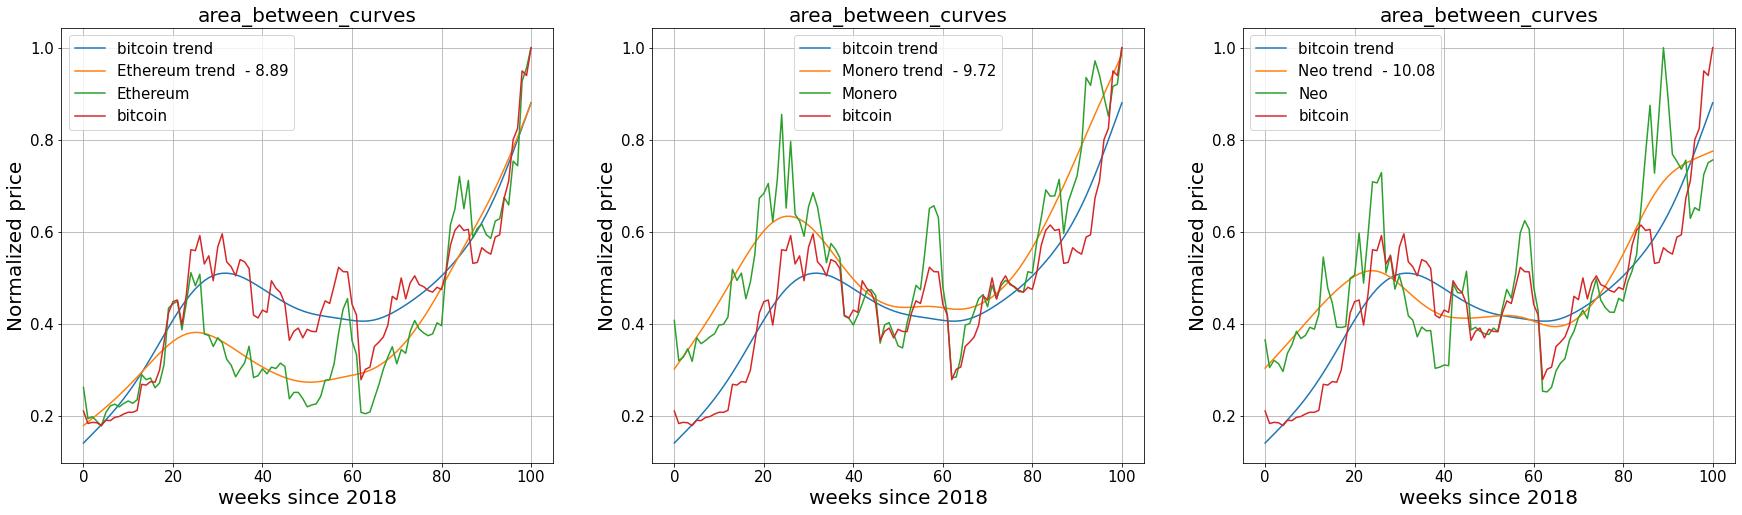

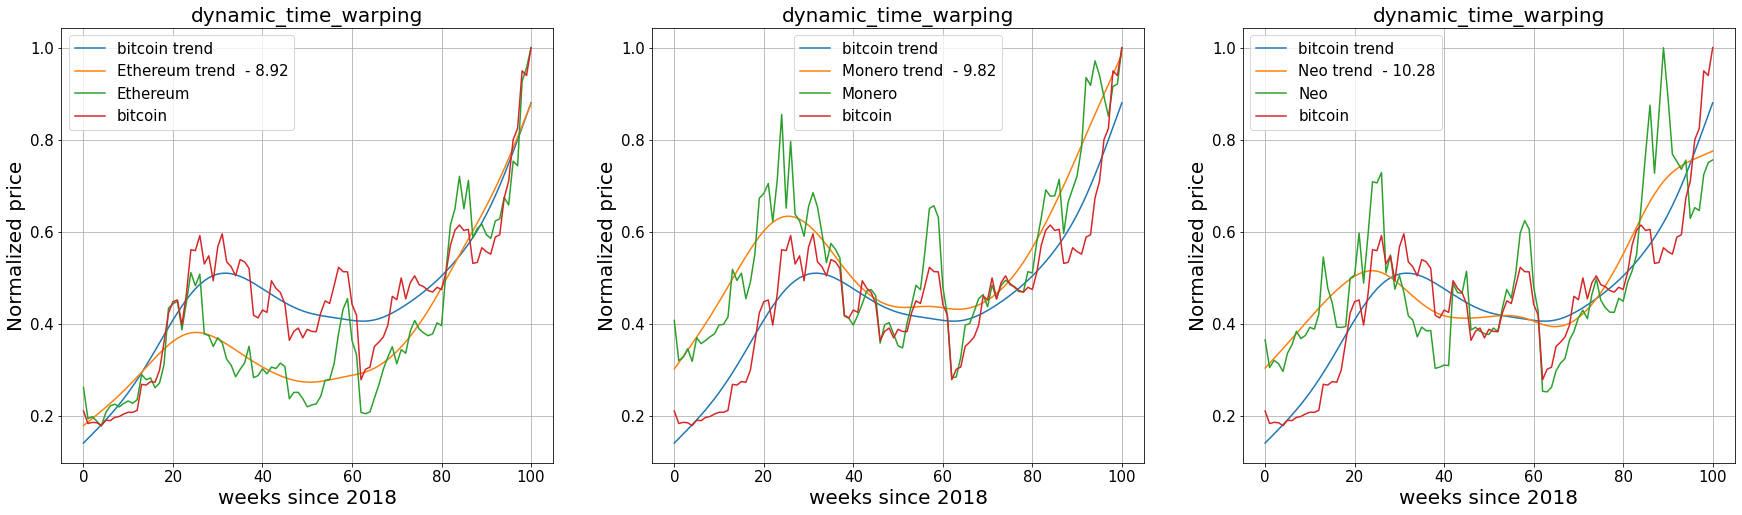

In [22]:
metrics = coins.columns.tolist()[-5:]
bitcoin_trend = coins.loc['Bitcoin']['normalized_price_trend']
bitcoin = coins.loc['Bitcoin']['normalized_price']
for n, metric in enumerate(metrics):
    values = coins.sort_values(metric).head(3)
    plt.figure(n+1, figsize=(30,8))
    N=1
    for index, row in values.iterrows():
        plt.subplot(130+N)
        N += 1
        price = row['normalized_price_trend']
        plt.plot(bitcoin_trend, label= 'bitcoin trend')
        plt.plot(price, label = index + ' trend '+ ' - '+str(row[metric]))
        plt.plot(row['normalized_price'], label = index)
        plt.plot(bitcoin, label = 'bitcoin')
        plt.title(metric, fontsize = 20)
        plt.yticks(fontsize=15)
        plt.xticks(fontsize=15)
        plt.xlabel('weeks since 2018', fontsize=20)
        plt.ylabel('Normalized price', fontsize=20)
        plt.grid(True)
        plt.legend(fontsize=15)





### Todas las métricas parecen funcionar correctamente aunque con diferencias entre ellas. Como en el proceso siguiente se utilizará k-means y la distancia entre curvas disponible además de la euclidea es el DTW, esta es la que se utilizará para todos los análisis. Como la relación entre los precios parece no ser unicamente en la tendencia sino que también parece haber similitudes en la curva de precio normalizado, esta última es la que se utilizará, ya que contiene más información.


## Clustering

In [23]:
import tslearn.clustering as tsclustering
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler

### Preprocesamiento de las series temporales

In [24]:
normalized_prices = np.array([np.array(value) for value in coins['normalized_price'].values])
np.random.shuffle(normalized_prices)
normalized_prices.reshape(-1,1)
normalized_prices = TimeSeriesScalerMeanVariance().fit_transform(normalized_prices)
normalized_prices = TimeSeriesResampler(sz=64).fit_transform(normalized_prices)

### Como no se sabe la cantidad de clusters que se deben utilizar se buscará este valor a partir de la curva de variación inercia VS K

In [189]:
inertia = []
for n in np.arange(1, 11, 1):
    
    n_clusters = n
    seed = 0
    crypto_cluster = tsclustering.TimeSeriesKMeans(n_clusters = n_clusters,
                                            verbose = False,
                                            n_init = 1,
                                            n_jobs=-1,
                                            tol = 0.0005,
                                            random_state = seed,
                                            metric = 'dtw')
    y = crypto_cluster.fit_predict(normalized_prices)
    var = crypto_cluster.inertia_
    inertia.append(var)
    print(var)


15.192263010792352
11.024767497263692
9.486437814014485
8.263420178165482
7.414586998328522
7.043792953592913
6.511092854369773
6.2767456258136685
5.9037216335828635
5.61509745026884


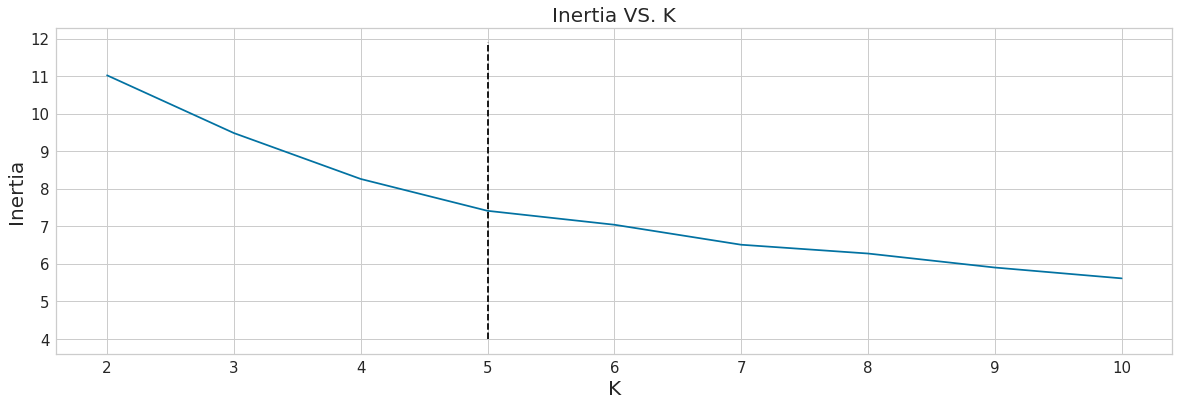

In [235]:

inertia = inertia[1:]
plt.figure(1, figsize=(20,6));
plt.plot(np.arange(2, 11, 1), inertia);
plt.plot([5 for n in range(80)],np.arange(4,12,0.1),'--',color='black')
plt.title('Inertia VS. K', fontsize=20);
plt.ylabel('Inertia', fontsize=20);
plt.yticks(fontsize=15);
plt.xticks(np.arange(2, 11, 1), fontsize=15);
plt.xlabel('K', fontsize=20);
plt.grid(True)
plt.show()

### El valor elegido para k es 5

In [214]:
del crypto_cluster
n_clusters = 5
seed = 0
crypto_cluster = tsclustering.TimeSeriesKMeans(n_clusters = n_clusters,
                                        verbose = False,
                                        n_init = 800,
                                        n_jobs=-1,
                                        tol = 0.0005,
                                        random_state = seed,
                                        metric = 'dtw')

crypto_cluster.fit(normalized_prices)
crypto_cluster.to_json('./trained_model_price.json')
y = crypto_cluster.predict(normalized_prices)
distances_price = crypto_cluster.transform(normalized_prices)
print('La inercia es: ',crypto_cluster.inertia_)




La inercia es:  6.7556381395960905
El tiempo es: 1361.6926090717316


### Para comprobar que todos los clusters tengan más o menos la misma distancia se obtiene el promedio de cada cluster

In [243]:
cluster_distance_price = np.zeros(n_clusters)

for n in range(n_clusters):
    cluster_distance_price[n] = round(np.mean([value[n] for value in distances_price]), 2)
print(cluster_distance_price)



[4.97 4.67 5.43 4.87 6.86]


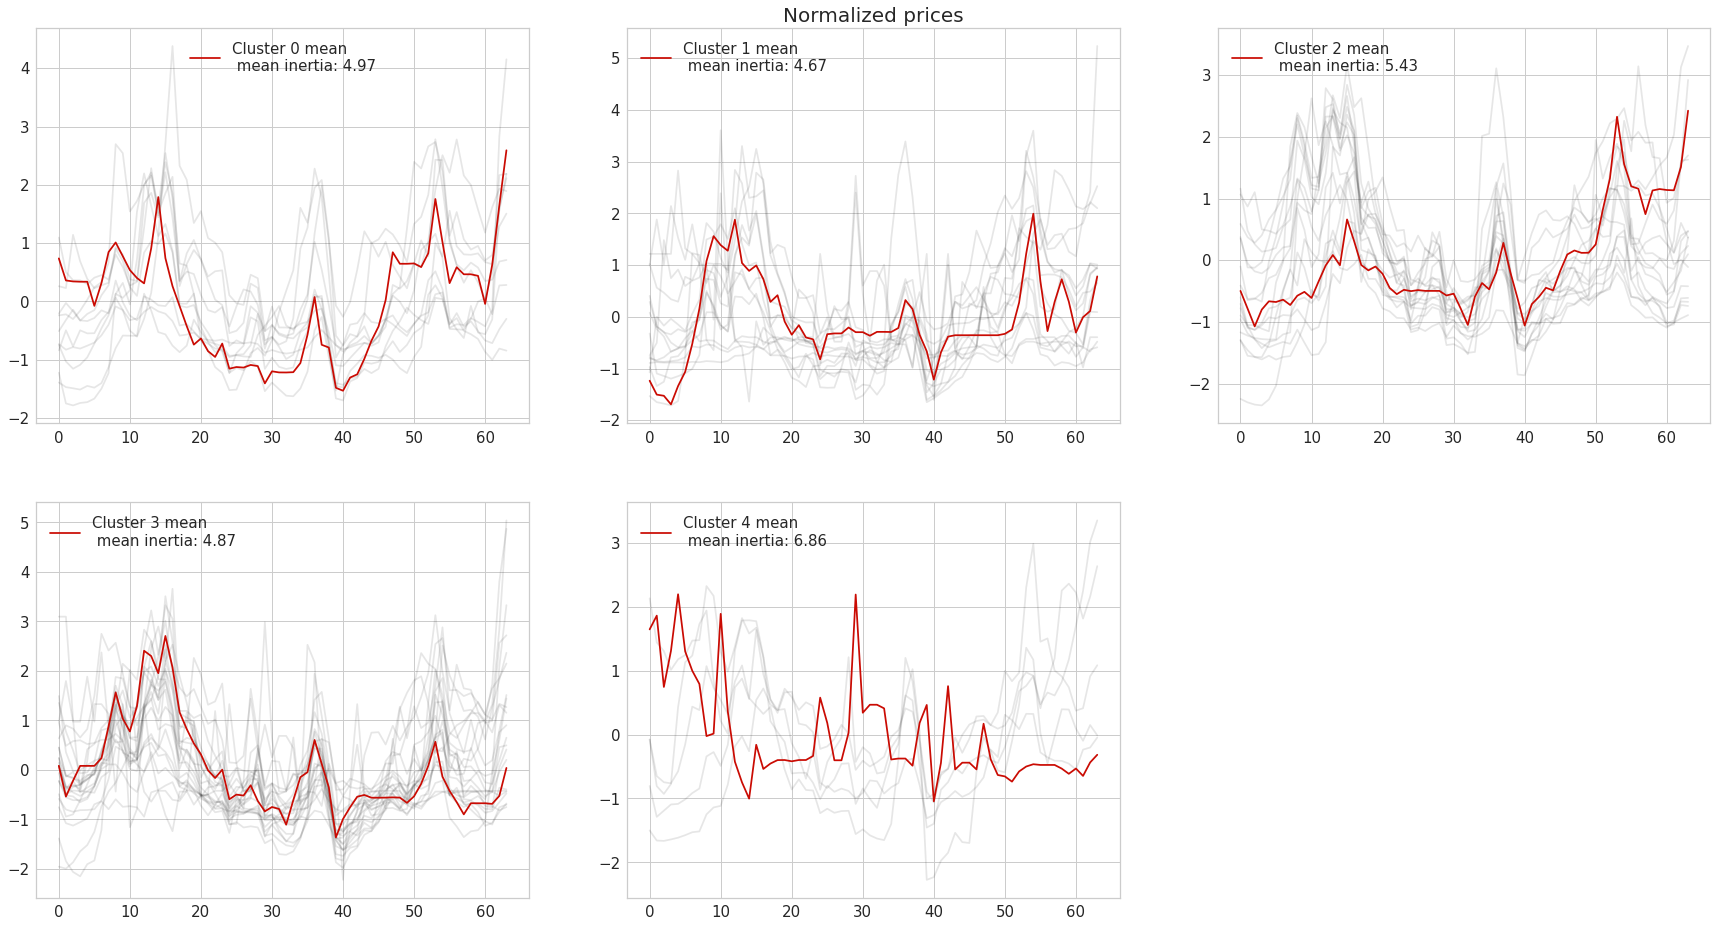

In [240]:
X_train = normalized_prices
y_pred = y
plt.figure(1,figsize=(30,16))
for yi in range(n_clusters): 
    plt.subplot(2, 3, 1 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.1)
    plt.plot(crypto_cluster.cluster_centers_[yi].ravel(),
            "r-",
            label=f'Cluster {yi} Mean\n mean inertia: {cluster_distance_price[yi]}')
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    plt.legend(fontsize=15)
    if yi == 1:
        plt.title("Normalized prices", fontsize=20)



### Se puede ver que los agrupamientos funcionaron correctamente y todos los clusters tienen el mismo orden de magnitud en su dtw promedio por lo que se se estima que el k utilizado es válido.

In [217]:

prices = np.array([np.array(value) for value in coins['normalized_price'].values])
prices.reshape(-1, 1)
prices = TimeSeriesScalerMeanVariance().fit_transform(prices)
prices = TimeSeriesResampler(sz=64).fit_transform(prices)
y = crypto_cluster.predict(prices)
coins['cluster'] = y
cluster_bitcoin = coins.loc['Bitcoin']['cluster']
print(cluster_bitcoin)

2


### El grupo al cual pertenece el bitcoin es el número 2

In [218]:
coins.groupby('cluster').mean()

,correlation,curve_lenght,fretchet,partial_curve_mapping,area_between_curves,dynamic_time_warping
cluster,,,,,,
0,22.195231,3.827000,0.473000,9.523000,17.317000,17.567000
1,25.726757,3.615000,0.573571,14.019286,17.138571,17.387857
2,18.909787,4.970000,0.414000,9.060000,16.798000,16.958667
3,21.755344,4.827727,0.659545,20.135000,19.470000,19.875000
4,39.944271,4.300000,0.792000,39.564000,47.010000,47.456000


### como se ve en la tabla agrupada, el promedio de la distancia de fretchet en el grupo 1 (o sea, el grupo al cual pertenece BTC) es el menor de todos, como es de esperarse. Hay 23 cryptomonedas en esta lista que parecen tener un comportamiento semanal similar al bitcoin.

In [219]:
coins.groupby('cluster').count()

,market_cap,normalized_price,price,volume,year,price_cycle,price_trend,normalized_price_cycle,normalized_price_trend,correlation,curve_lenght,fretchet,partial_curve_mapping,area_between_curves,dynamic_time_warping
cluster,,,,,,,,,,,,,,,
0,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
1,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
2,16,16,16,16,16,16,16,16,16,15,15,15,15,15,15
3,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22
4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


### Se realizará un análisis ANOVA con el fin de determinar si las diferencias entre las distancias  de fretchet promedio de cada cluster son significativas. En caso de que las diferencias sean significativas se puede asumir que la agrupación es correcta, en caso de que no haya diferencias significativas significaría que puede haber curvas agrupadas de forma erronea por lo que se debe corregir el modelo.

Cluster 0: 0.311
Cluster 1: 0.053
Cluster 2: 0.099
Cluster 3: 0.176
Cluster 4: 0.039
Bartlett:  0.146


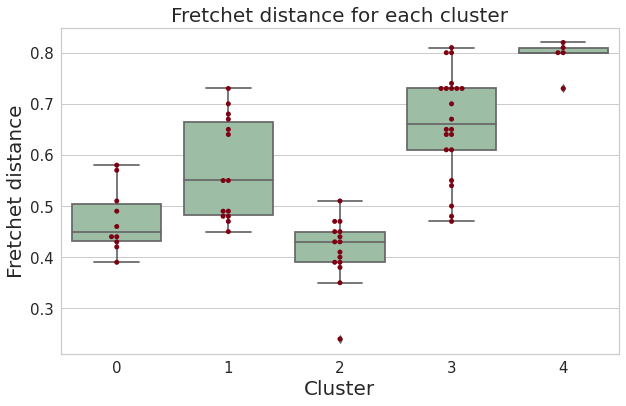

In [230]:

discarted = []
dtw = []
# Test de normalidad Shapiro-Wilks. Si p_value es muy pequeño (< 0,05 ) se rechaza la normalidad
for n in range(n_clusters):
    x = coins[coins.cluster==n]['fretchet'].sort_values()
    if n == cluster_bitcoin:
        x = x[:-1]
    if len(x)>2:
        statistic, p_value = stats.shapiro(x)
        if p_value > 0.05 and len(list(x)) > 3:
            dtw.append(x)
        print(f'Cluster {n}:', round(p_value,3))
# Test de homogeneidad de las varianzas Bartlett>>> Si p_valor es muy pequeño (< 0,05 ) se considera que las varianzas no son homogéneas
dtw = tuple((value.values for value in dtw))
statistic, p_value = stats.bartlett(*dtw)
print('Bartlett: ', round(p_value,3))

plt.figure(1, figsize=(10,6))
plt.figure(1,figsize=(10,6))
ax = sns.boxplot(x='cluster', y='fretchet', data=coins, color='#99c2a2')
ax = sns.swarmplot(x="cluster", y="fretchet", data=coins,color='#7d0013')
plt.title('Fretchet distance for each cluster',fontsize=20)
plt.ylabel('Fretchet distance',fontsize=20)
plt.xlabel('Cluster', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);


### La normalidad en el caso del cluster 4 se rechaza. Sin embargo este cluster es el más alejado del 1, que es grupo de Bitcoin, por lo tanto, se considerará que las diferencias en este caso son significativas. En cuanto a la homogeneidad de varianzas no se rechazó la hipótesis. Por lo tanto se procederá a realizar un análisis ANOVA sin considerar el cluster 4.

In [231]:
f_value, p_value = stats.f_oneway(*dtw)

print(f_value, p_value)

26.072541681896308 9.548076817394015e-11


### El p-valor es menor a 0,05 por lo que existen diferencias significativas entre las medias de las distancias de fretchet de los grupos. Esto sugiere que los agrupamientos son correctos.

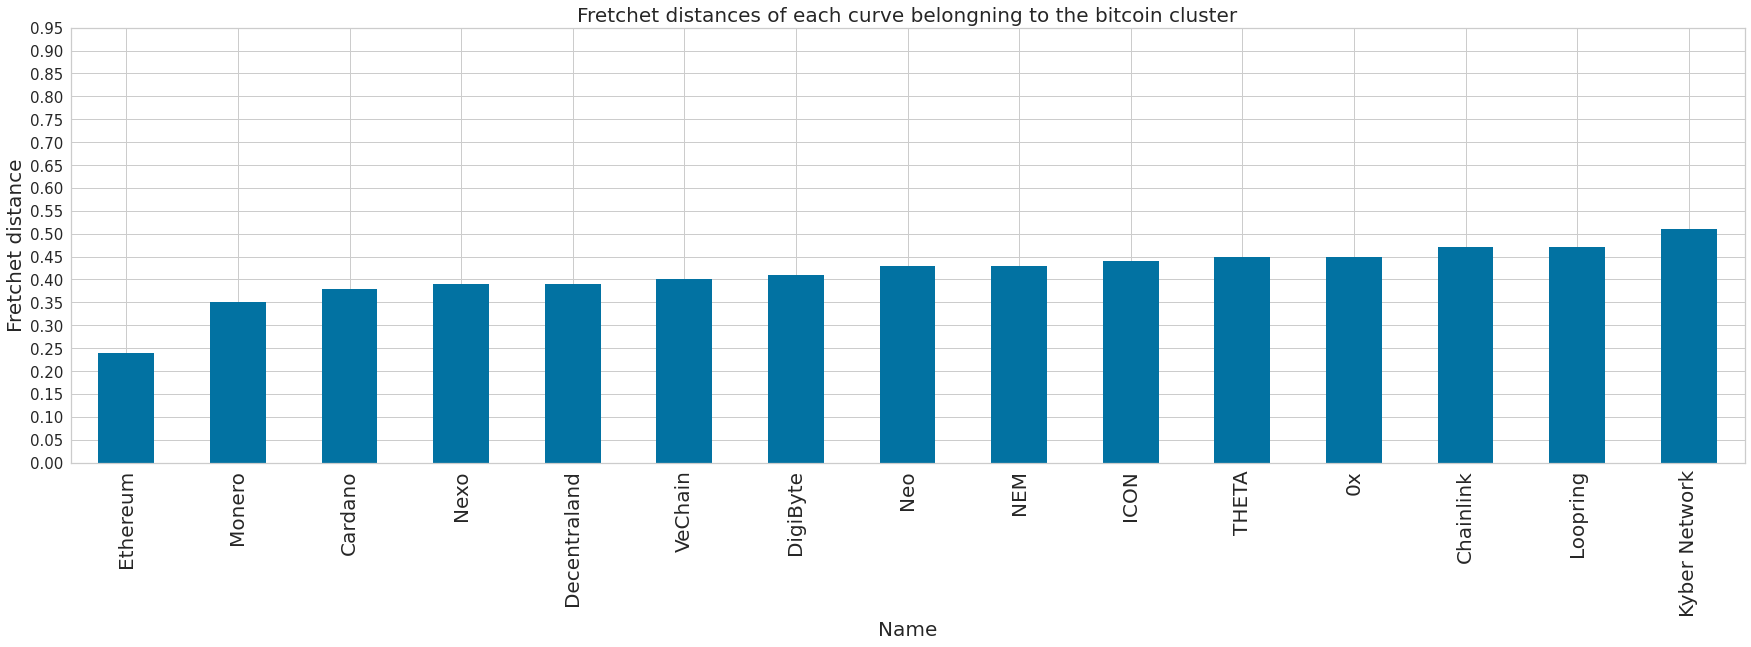

In [234]:
plt.figure(1, figsize=(30,8))
coins[coins.cluster == cluster_bitcoin]['fretchet'].sort_values()[:-1].plot.bar()
plt.title('Fretchet distances of each curve belongning to the bitcoin cluster', fontsize=20)
plt.ylabel('Fretchet distance', fontsize=20)
plt.xlabel('Name',fontsize =20)

plt.yticks(np.arange(0,1,0.05),fontsize=15)
plt.xticks(fontsize=20)
plt.grid(True)


### Conclusión:  Se concluye que el agrupamiento realizado es correcto considerando que las diferencias entre las medias de la distancia de Fretchet es significativa. En el futuro se probará la hipótesis de que es posible aumentar el dataset de entrenamiento de una red neuronal agregando datos de las monedas que se comportan de forma similar. Además se debe comprobar si este agrupamiento se mantiene si en lugar de datos semanales se utilizan datos de cada hora, minuto o día.

###Bibliografía:
https://pypi.org/project/similaritymeasures/
https://tslearn.readthedocs.io/en/stable/gen_modules/clustering/tslearn.clustering.TimeSeriesKMeans.html#tslearn.clustering.TimeSeriesKMeans



In [241]:
crypto_cluster.to_json('trained_model.json')